<center>
    <H1> CERVICALCANCER PREDICTION PROJECT</H1> 
    <h2>Base Modeling</h2>
    <hr>
</center>

## Importing Libaries and Reading Dataset

In [62]:
# importing basic libraries
from santa_modelling import np, pd, plt, sns, setJupyterNotebook, title
from santa_modelling import Explore,Split,OHE,Balance,SetIndex, FeatureScale, FeatureScaleAll
from santa_modelling import ClassificationModelDictionary, RunAll,Classify
import santa_modelling
#print(dir(santa_modelling))
setJupyterNotebook()

In [63]:
url = 'ImputeWithZero.csv'
df = pd.read_csv(url,index_col=0)
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.000,4.000,15.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,15.000,1.000,14.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,34.000,1.000,16.995,1.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,52.000,5.000,16.000,4.000,1.000,37.000,37.000,1.000,3.000,0.000,...,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
4,46.000,3.000,21.000,4.000,0.000,0.000,0.000,1.000,15.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [64]:
#df = df.drop(['Hinselmann','Citology'],axis=1)

## Temporarily Categorizing columns

In [65]:
df = df.reset_index()
df.head()

,index,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,0,18.000,4.000,15.000,1.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,1,15.000,1.000,14.000,1.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,2,34.000,1.000,16.995,1.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,3,52.000,5.000,16.000,4.000,1.000,37.000,37.000,1.000,3.000,...,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
4,4,46.000,3.000,21.000,4.000,0.000,0.000,0.000,1.000,15.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [66]:
df.columns

Index(['index', 'Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [67]:
index = 'index';target = 'Biopsy'
non_features = [index,target]

In [68]:
features = [col for col in df.columns if col not in non_features]

In [69]:
num_features = [feature for feature in features if df[feature].nunique() > 2]
print(num_features)

['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis']


In [70]:
features = [col for col in df.columns if col not in non_features]
cat_features=[feature for feature in features if df[feature].nunique() == 2]
print(cat_features)

['Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology']


In [71]:
df['Biopsy']=df['Biopsy'].map({1:'Yes',0:'No'})

## Modelling

In [72]:
data = Split(df,target=target)

Checking Imbalance
No    0.942
Yes   0.058
Name: Biopsy, dtype: float64
Do You Want to Treat Data?
Press "y" or "n" 
y
Treating Imbalance on Train Data
After Balancing
No    0.500
Yes   0.500
Name: Biopsy, dtype: float64
* *


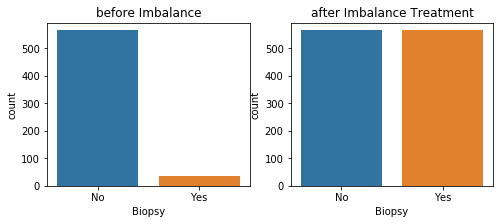

In [73]:
data = Balance(data = data)

In [74]:
data = SetIndex(data=data, index=index) # setting index before modeling

In [75]:
data[2].isnull().sum()

0

#### Running All Models on the dataset

> Error found in the code -- LightGBMError: Do not support special JSON characters in feature name.

In [76]:
# therefore replacing the features names
data[0].columns = [col.replace('/','_per_').replace('(','_').replace(')','').replace(' ','_').replace('-','_')\
                   .replace(':','_')\
                   for col in data[0].columns]
data[1].columns = [col.replace('/','_per_').replace('(','_').replace(')','').replace(' ','_').replace('-','_')\
                   .replace(':','_')\
                   for col in data[1].columns]
print(data[0].columns)

Index(['Age', 'Number_of_sexual_partners', 'First_sexual_intercourse',
       'Num_of_pregnancies', 'Smokes', 'Smokes__years',
       'Smokes__packs_per_year', 'Hormonal_Contraceptives',
       'Hormonal_Contraceptives__years', 'IUD', 'IUD__years', 'STDs',
       'STDs__number', 'STDs_condylomatosis', 'STDs_vaginal_condylomatosis',
       'STDs_vulvo_perineal_condylomatosis', 'STDs_syphilis',
       'STDs_pelvic_inflammatory_disease', 'STDs_genital_herpes',
       'STDs_molluscum_contagiosum', 'STDs_HIV', 'STDs_Hepatitis_B',
       'STDs_HPV', 'STDs__Number_of_diagnosis', 'Dx_Cancer', 'Dx_CIN',
       'Dx_HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology'],
      dtype='object')


In [78]:
models = ClassificationModelDictionary()
# modelling without scaling
unscaled_data = data
trained_models, unscaled = RunAll(models=models,data=unscaled_data,phase='unscaled',
                                  scores=None,trained_models = {},use_params=False)
# modelling after the MINMAX scaling all columns irrespective of numerical or OHE columns
minmaxAll_data = FeatureScaleAll(data,scaler='MinMaxScaler')
trained_models, MinMaxAll = RunAll(models=models,data=minmaxAll_data,phase='MinMaxAll',
                                scores=None,trained_models = trained_models,use_params=False)
# modelling after the Z-Score scaling all columns irrespective of numerical or OHE columns
zcoreAll_data = FeatureScaleAll(data,scaler='StandardScaler')
trained_models, ZscoreAll = RunAll(models=models,data=zcoreAll_data,phase='ZscoreAll',
                                scores=None,trained_models = trained_models,use_params=False)
# modelling after the MINMAX scaling on numerical columns only discarding OHE columns to scale
minmax_data = FeatureScale(data,OHE_features=cat_features,scaler='MinMaxScaler')
trained_models, MinMax = RunAll(models=models,data=minmax_data,phase='MinMax',
                                scores=None,trained_models = trained_models,use_params=False)
# modelling after the Z-Score scaling on numerical columns only discarding OHE columns to scale
zcore_data = FeatureScale(data,OHE_features=cat_features,scaler='StandardScaler')
trained_models, Zscore = RunAll(models=models,data=zcore_data,phase='Zscore',
                                scores=None,trained_models = trained_models,use_params=False)
scores = pd.concat([unscaled,MinMaxAll,ZscoreAll,MinMax,Zscore],axis=0).sort_values(['AUC_ROC','Recall'], ascending=False)

Applying MinMaxScaler
Applying StandardScaler
Applying MinMaxScaler
Applying StandardScaler


In [79]:
scores.head(10)

,Model,Phase,AUC_ROC,TrainingAccuracy,TestingAccuracy,Recall,Precision,F1_Score,FalsePositives,FalseNegatives
0,LogisticRegression,MinMaxAll,0.925,0.962,0.946,0.900,0.600,0.720,12,2
0,SVC,MinMaxAll,0.925,0.951,0.946,0.900,0.600,0.720,12,2
0,LogisticRegression,MinMax,0.925,0.962,0.946,0.900,0.600,0.720,12,2
0,SVC,MinMax,0.925,0.951,0.946,0.900,0.600,0.720,12,2
0,GradientBoostingClassifier,MinMaxAll,0.914,0.998,0.969,0.850,0.773,0.810,5,3
0,GradientBoostingClassifier,MinMax,0.914,0.998,0.969,0.850,0.773,0.810,5,3
0,GradientBoostingClassifier,unscaled,0.910,0.998,0.961,0.850,0.708,0.773,7,3
0,BaggingClassifier,MinMax,0.906,0.996,0.953,0.850,0.654,0.739,9,3
0,LogisticRegression,Zscore,0.902,0.971,0.946,0.850,0.607,0.708,11,3
0,LogisticRegression,unscaled,0.900,0.964,0.942,0.850,0.586,0.694,12,3


> NOTES
* Imputing with Zero is making Logistic Regression in the Top.
* Although the scores will slightly down, we have made use of most records possible. so to the unknown datasets it will perform little more better
* It looks like tree based ones went backward giving good results
* Probably we can do models with Bagging or boosting alogorithms with any non-tree based base estimators
* and check whether they perform better. if not we will completely disregard ensemble methods

In [80]:
scores.to_csv('scores_ImputeWithZero.csv',index=False)

In [82]:
from datetime import datetime; import pickle
time = datetime.now().strftime('%Y_%b_%d_%H_%M_%S')
pickle.dump(data, open('{}_dataImputedWithZero.pkl'.format(time), 'wb'))
#pickle.load(open(f'{time}_dataImputedWithZero.pkl', 'rb'))

In [83]:
cat_features

['Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology']